In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Recherche de minimums

In [47]:

class FunctionWrapper:
    def __init__(self, f):
        self.f = f
        self.nb_calls = 0

    def __call__(self, x):
        self.nb_calls += 1
        return self.f(x)
    

    def plot(self, a, b, **kwargs):
        x = np.linspace(a, b, 100)
        y = self.f(x)
        plt.plot(x, y, **kwargs)
        plt.grid()


## Dichotomie

In [48]:


def dichotomie(f, a, b, epsilon=10**-2):
   
    while b-a > epsilon:
        m = (a + b) / 2
        f_m = f(m)
        f_a = f(a)
        f_b = f(b)
        if (f_m - f_a) / (m - a) >= 0:
            b = m
        elif (f_m - f_b) / (m - b) <= 0:
            a = m
        else:
            f_am = f((a + m)/2)
            f_bm = f((b + m)/2)
            if (f_m - f_am) / (m - (a + m)/2) >= 0:
                b = m
            if (f_m - f_bm) / (m - (b + m)/2) <= 0:
                a = m
            else:
                a, b = (a + m) / 2, (b + m) / 2
    
    return (a + b) / 2



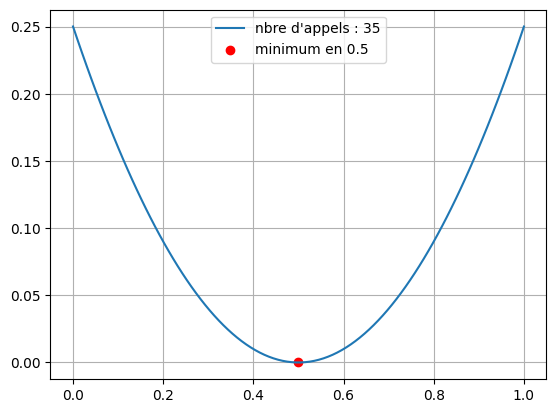

In [49]:

f_dic = FunctionWrapper(lambda x: (x - 0.50002)**2)

print(f_dic)
x_0 = dichotomie(f_dic, 0, 1)
f_dic.plot(0, 1, label=f"nbre d'appels : {f_dic.nb_calls}")
plt.scatter(x_0, f_dic(x_0), c='red', label=f"minimum en {x_0}")
plt.legend()

## GoldenSearch

In [50]:
def golden_search(f, a, b, epsilon=10**-2):
    phi = (1 + np.sqrt(5)) / 2
    while b - a > epsilon:
        c = a + (b - a) / (phi + 1)
        d = b - (b - a) / (phi + 1)
        if f(c) < f(d):
            b = d
        else:
            a = c
    return (a + b) / 2

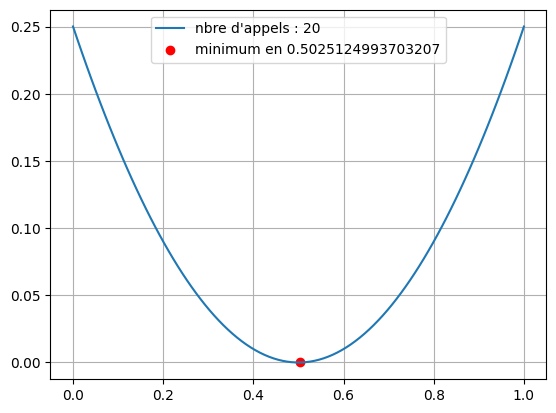

In [51]:

f_golgen = FunctionWrapper(lambda x: (x - 0.50002)**2)


x_0 = golden_search(f_golgen, 0, 1)
f_golgen.plot(0, 1, label=f"nbre d'appels : {f_golgen.nb_calls}")
plt.scatter(x_0, f_golgen(x_0), c='red', label=f"minimum en {x_0}")
plt.legend()

## Temps de calcul

In [52]:
import timeit

x_0 = dichotomie(f_dic, 0, 1)

def evalute_time():
    SETUP_CODE = '''
from __main__ import FunctionWrapper, dichotomie, golden_search
f_dic = FunctionWrapper(lambda x: (x - 0.50002)**2)
f_golgen = FunctionWrapper(lambda x: (x - 0.50002)**2)
    '''

    TEST_DICO = ''' 
x_0 = dichotomie(f_dic, 0, 1)
'''

    TEST_GOLGEN= '''
x_0 = golden_search(f_golgen, 0, 1)
'''

    # timeit.repeat statement
    dico_times = timeit.repeat(setup=SETUP_CODE,
                          stmt=TEST_DICO,
                          repeat=3,
                          number=10000)
    golden_times = timeit.repeat(setup=SETUP_CODE,
                          stmt=TEST_GOLGEN,
                          repeat=3,
                          number=10000)

    # printing minimum exec. time
    print('dichotomie time: {}'.format(min(dico_times)))
    print('golden_search time: {}'.format(min(golden_times)))
          

evalute_time()


dichotomie time: 0.1510290639998857
golden_search time: 0.13965769999958866


##